In [1]:
!pip install arch

   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---- ----------------------------------- 112.6/924.9 kB 2.2 MB/s eta 0:00:01
   ----------------- ---------------------- 399.4/924.9 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 924.9/924.9 kB 7.3 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Load the data
ticker = 'SPY'
start_date = '2005-01-01'
end_date = '2024-05-30'

# Import data
sp_data = yf.download(
                    tickers=ticker,
                    start=start_date,
                    end=end_date,
                    progress=False)
                    
\

# Display the data information
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2005-01-03 to 2024-05-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4884 non-null   float64
 1   High       4884 non-null   float64
 2   Low        4884 non-null   float64
 3   Close      4884 non-null   float64
 4   Adj Close  4884 non-null   float64
 5   Volume     4884 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 267.1 KB


C:\Users\tanus\AppData\Local\Temp\ipykernel_8804\1204791017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_data['Daily Returns (%)'] = 100 * sp_data['Adj Close'].pct_change()


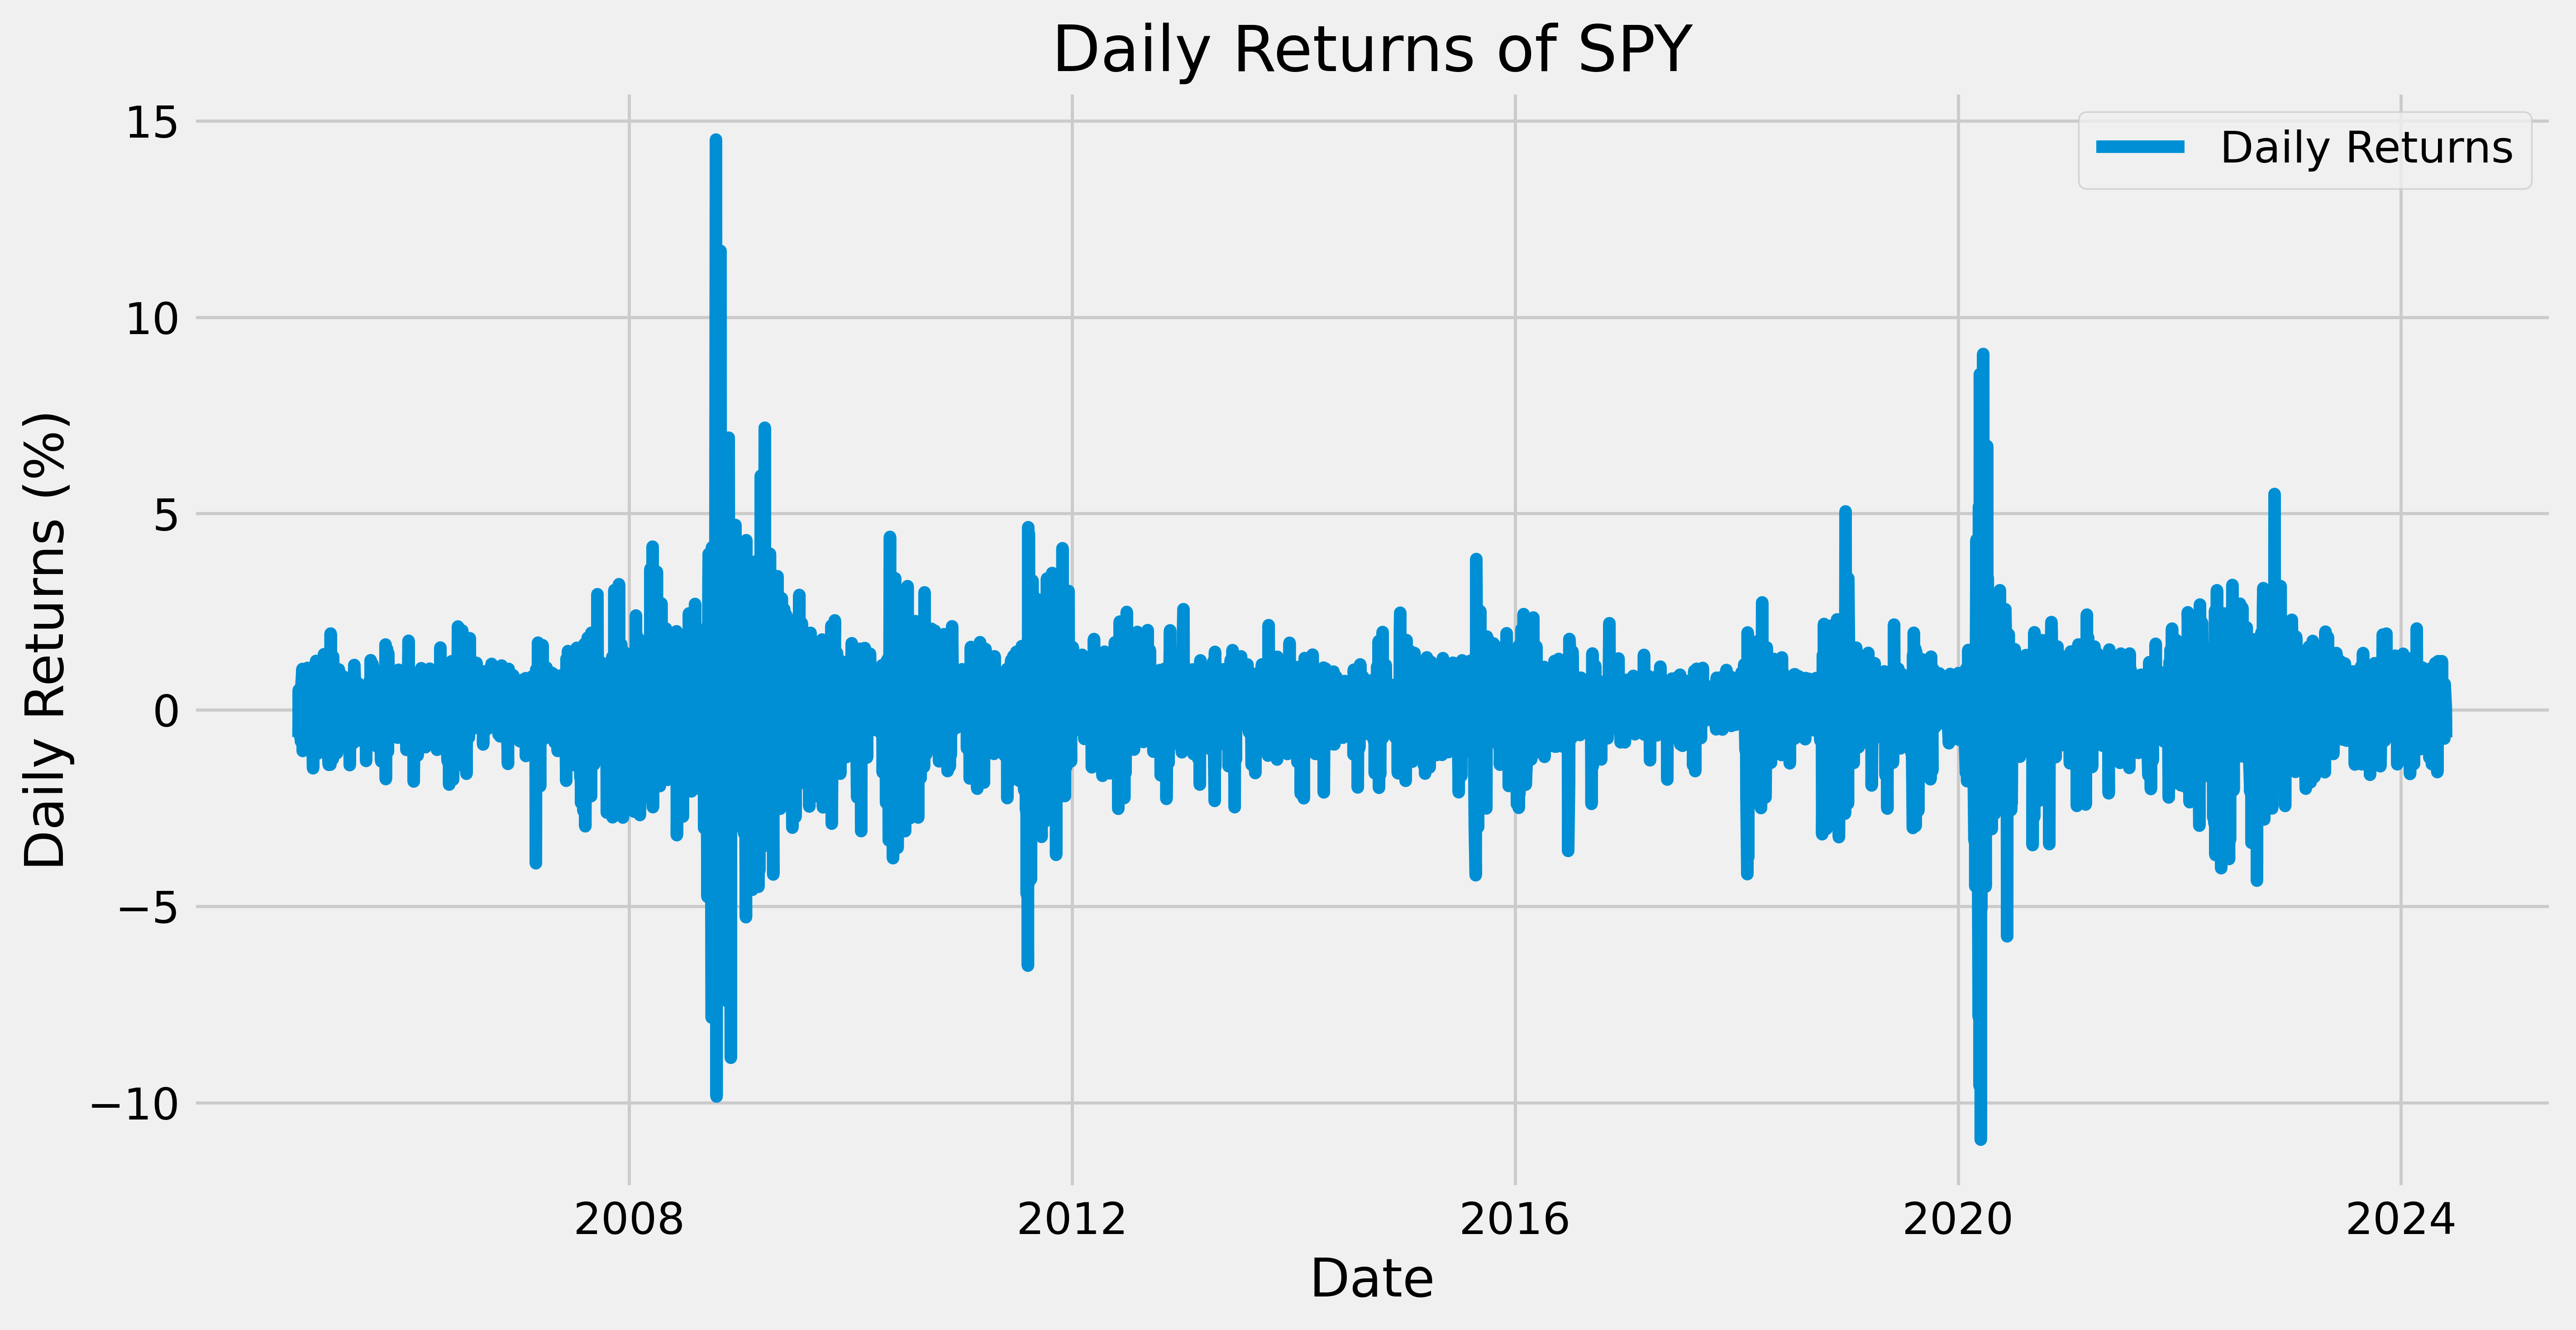

In [22]:
# Calculate daily returns as percentages
sp_data['Daily Returns (%)'] = 100 * sp_data['Adj Close'].pct_change()
sp_data = sp_data.dropna(subset=['Daily Returns (%)'])
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6), dpi=500)
plt.plot(sp_data.index, sp_data['Daily Returns (%)'], label='Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.title('Daily Returns of SPY')
plt.legend()
plt.show()


In [23]:
import numpy as np

# Calculate daily standard deviation of returns
std_daily = sp_data['Daily Returns (%)'].std()
print(f'Daily volatility: {round(std_daily, 2)}%')

# Convert daily volatility to monthly volatility
# Assuming 21 trading days in a month
std_monthly = np.sqrt(21) * std_daily
print(f'\nMonthly volatility: {round(std_monthly, 2)}%')

# Convert daily volatility to annual volatility
# Assuming 252 trading days in a year
std_annual = np.sqrt(252) * std_daily
print(f'\nAnnual volatility: {round(std_annual, 2)}%')


Daily volatility: 1.21%

Monthly volatility: 5.54%

Annual volatility: 19.18%


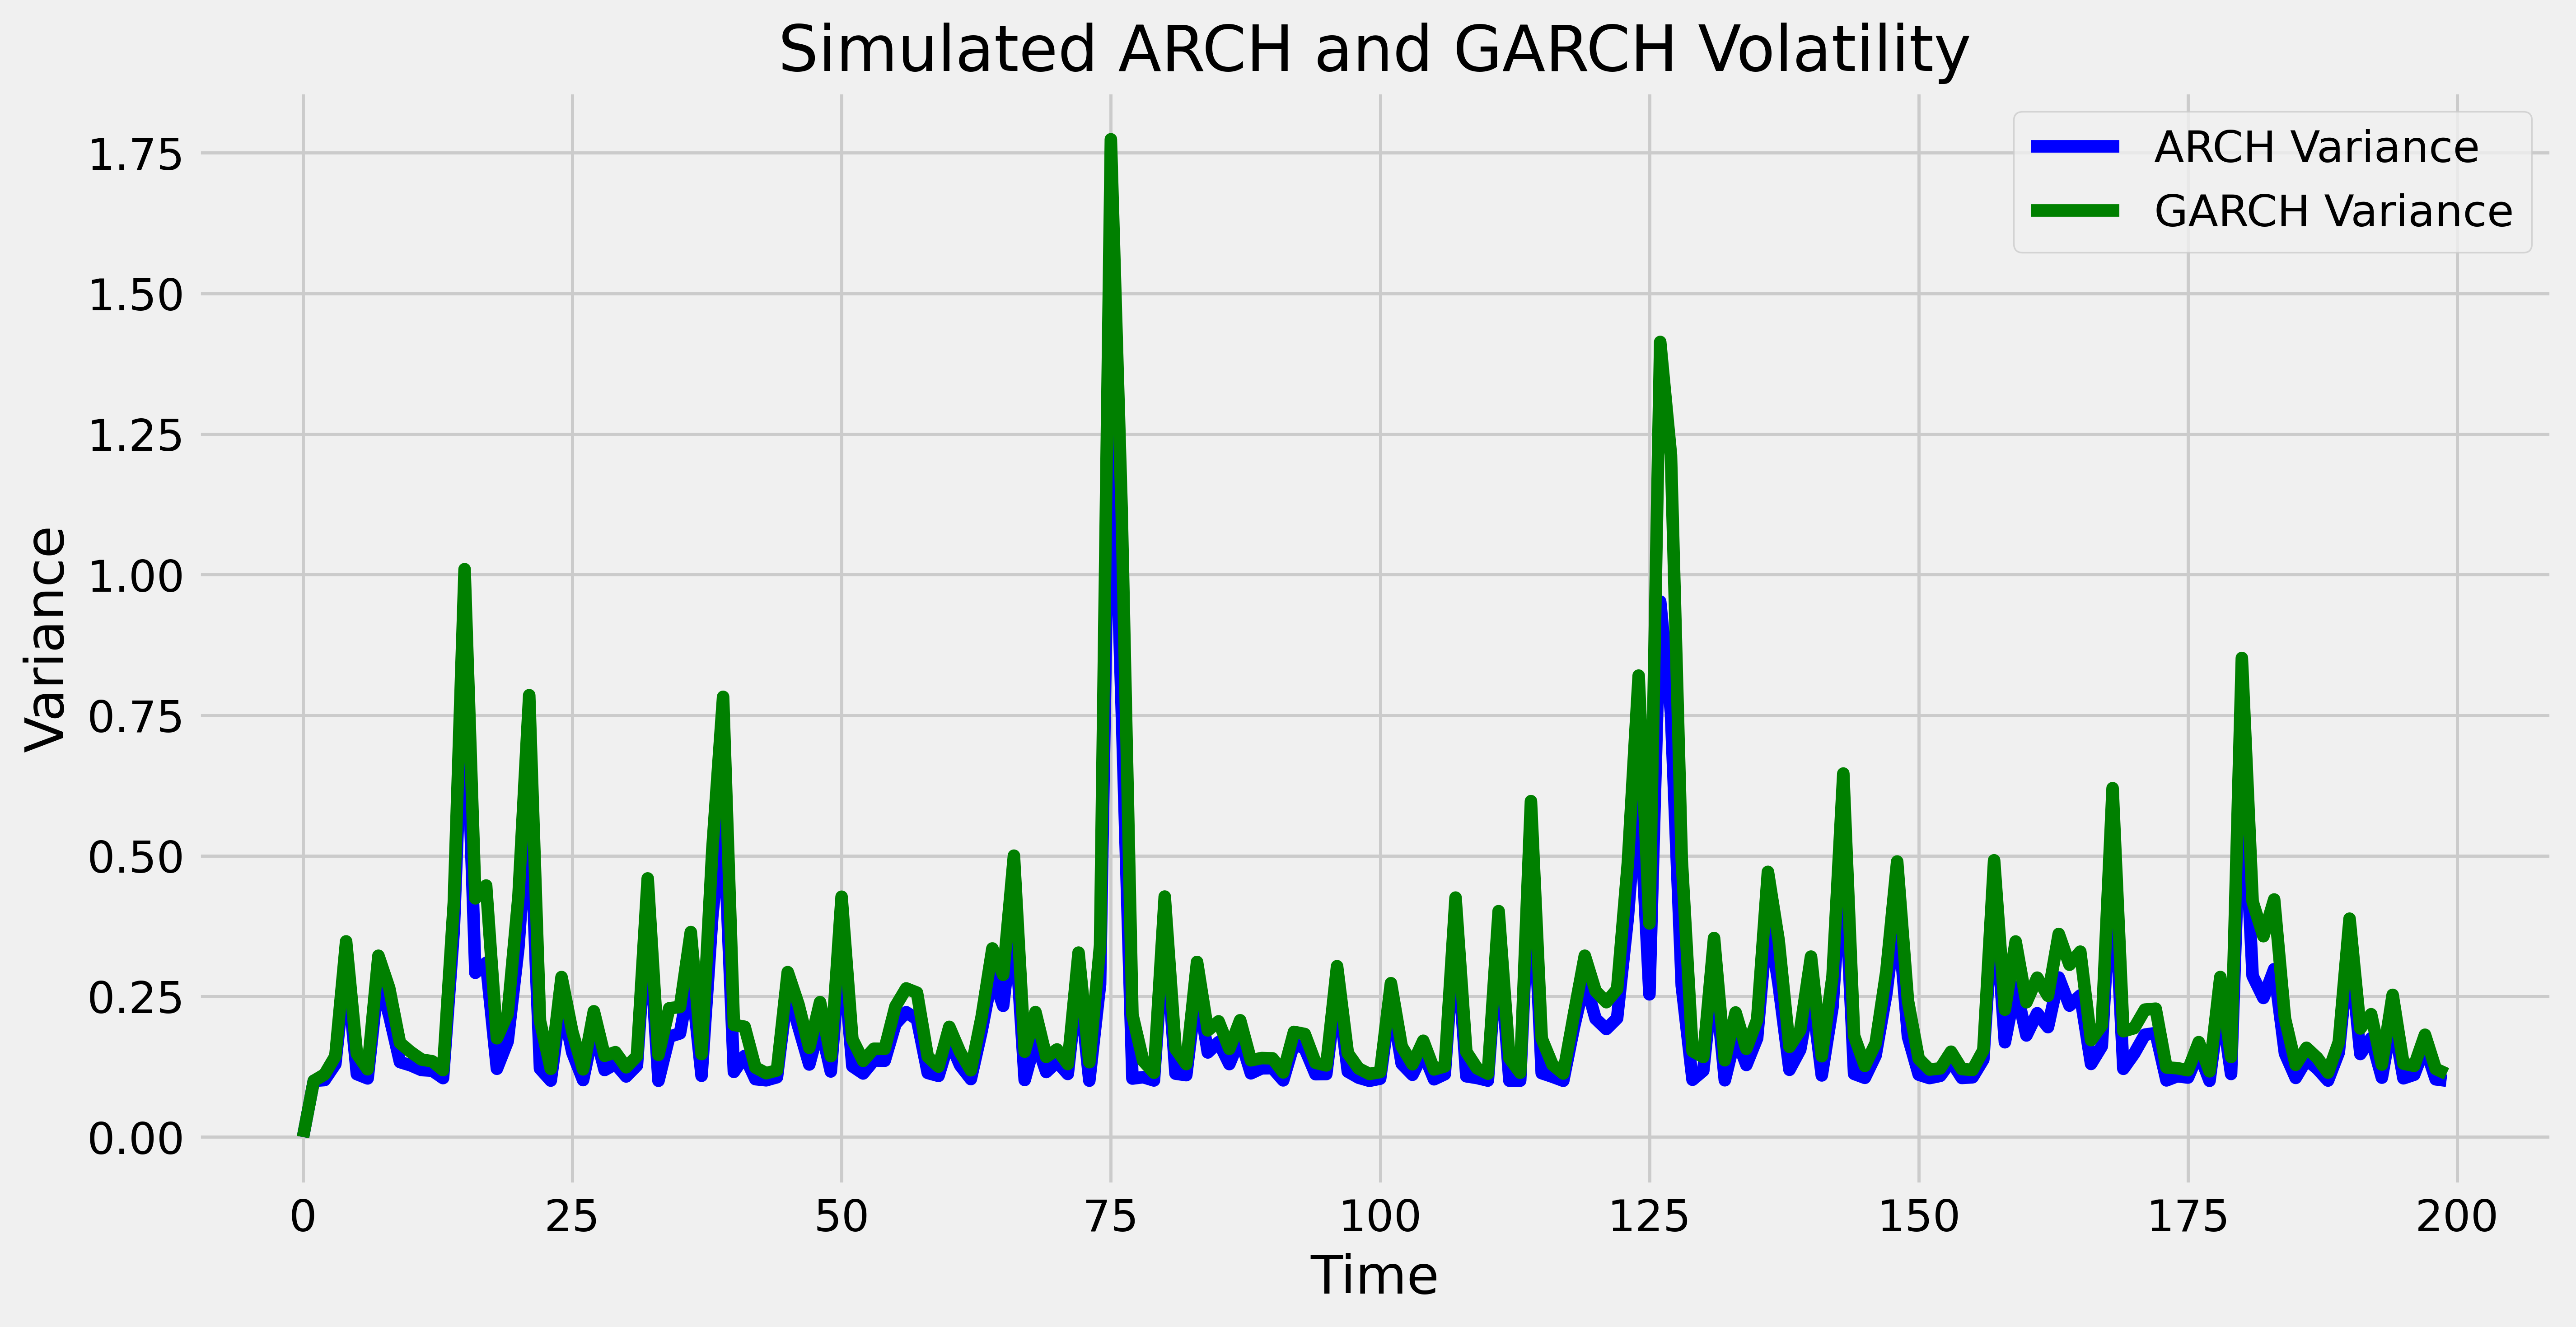

In [24]:
def simulate_garch_series(num_points, omega, alpha, beta=0):
    np.random.seed(42)
    noise = np.random.normal(size=num_points)
    residuals = np.zeros_like(noise)
    variances = np.zeros_like(noise)
    
    for t in range(1, num_points):
        variances[t] = omega + alpha * residuals[t-1]**2 + beta * variances[t-1]
        residuals[t] = np.sqrt(variances[t]) * noise[t]
    
    return residuals, variances

# Simulate an ARCH(1) series
arch_residuals, arch_variances = simulate_garch_series(num_points=200, omega=0.1, alpha=0.7)

# Simulate a GARCH(1,1) series
garch_residuals, garch_variances = simulate_garch_series(num_points=200, omega=0.1, alpha=0.7, beta=0.1)

# Plot the ARCH and GARCH variances
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6), dpi=500)

# Plot the ARCH variance
plt.plot(arch_variances, color='blue', label='ARCH Variance')

# Plot the GARCH variance
plt.plot(garch_variances, color='green', label='GARCH Variance')

# Display the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Simulated ARCH and GARCH Volatility')
plt.show()

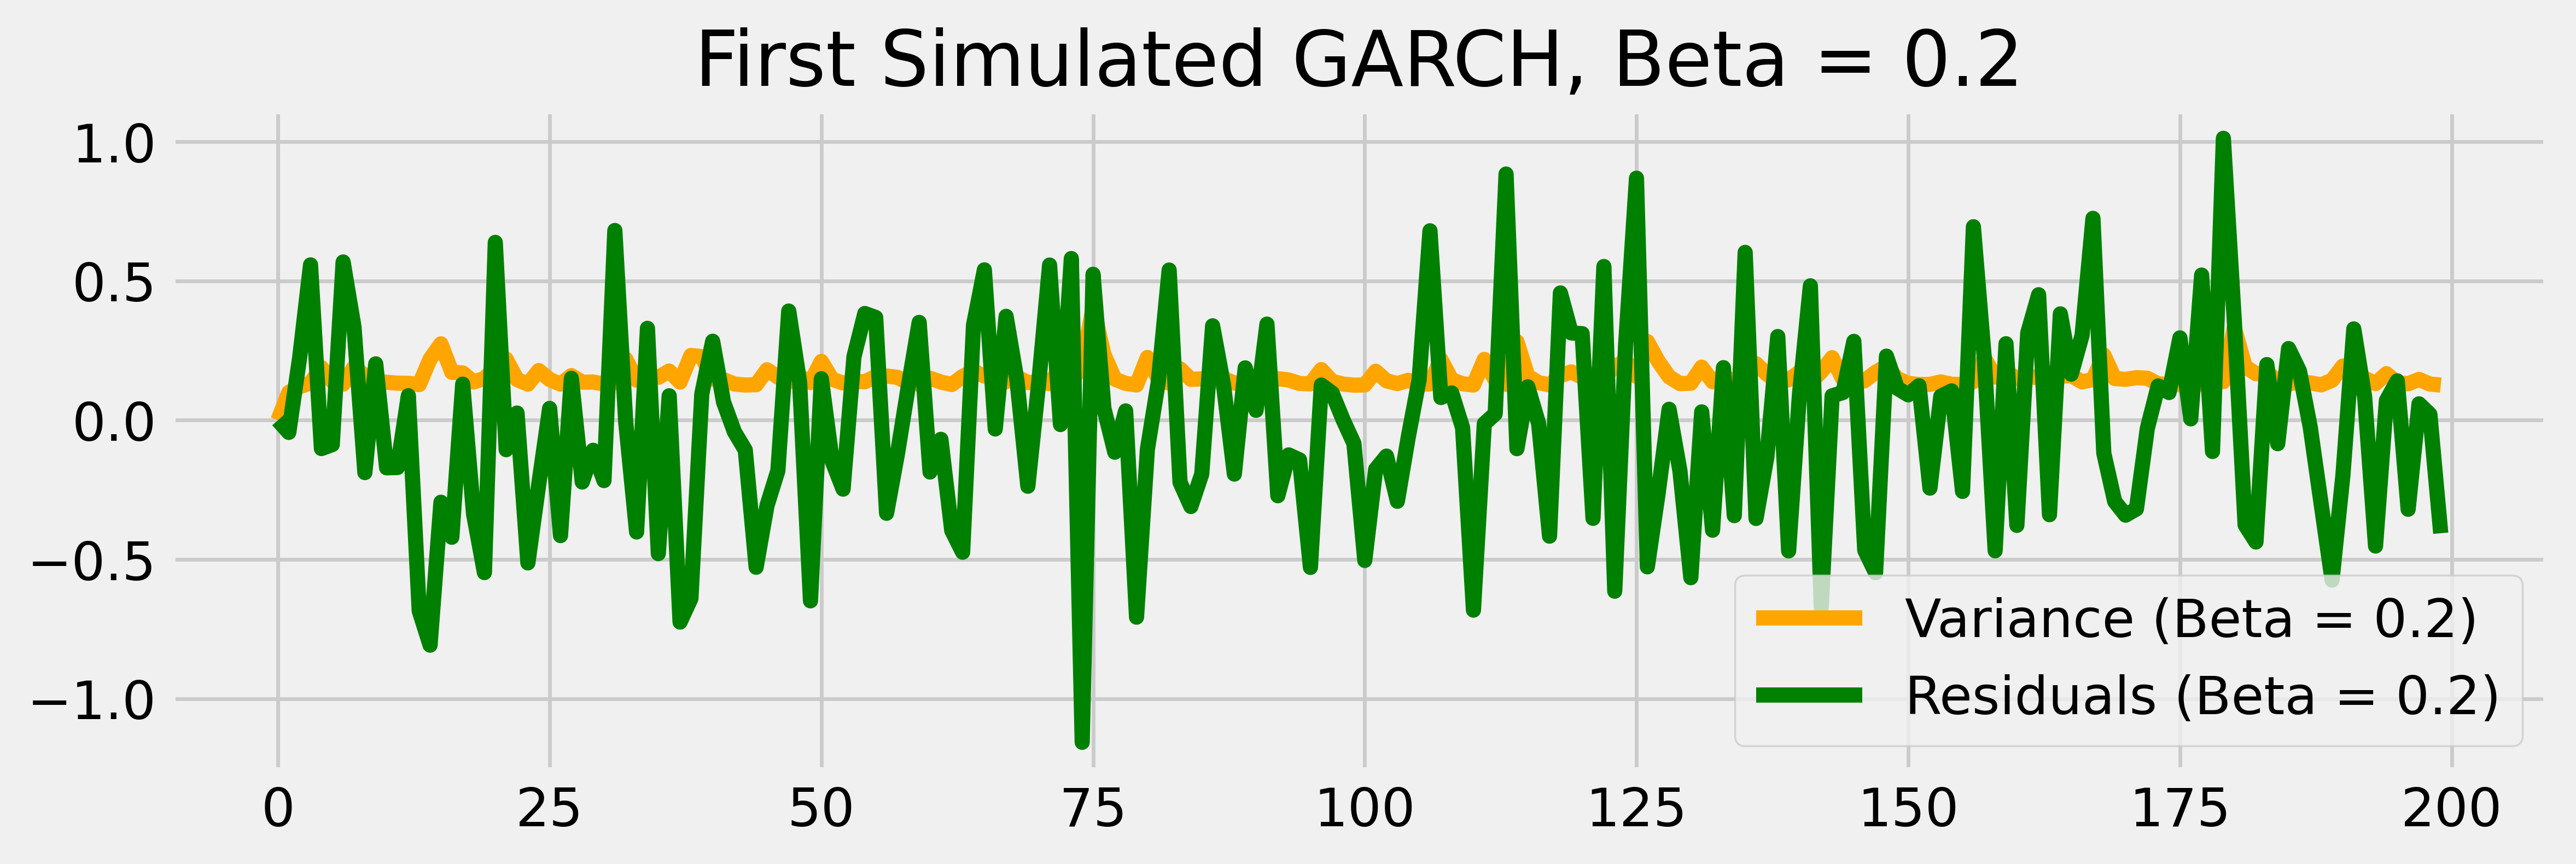

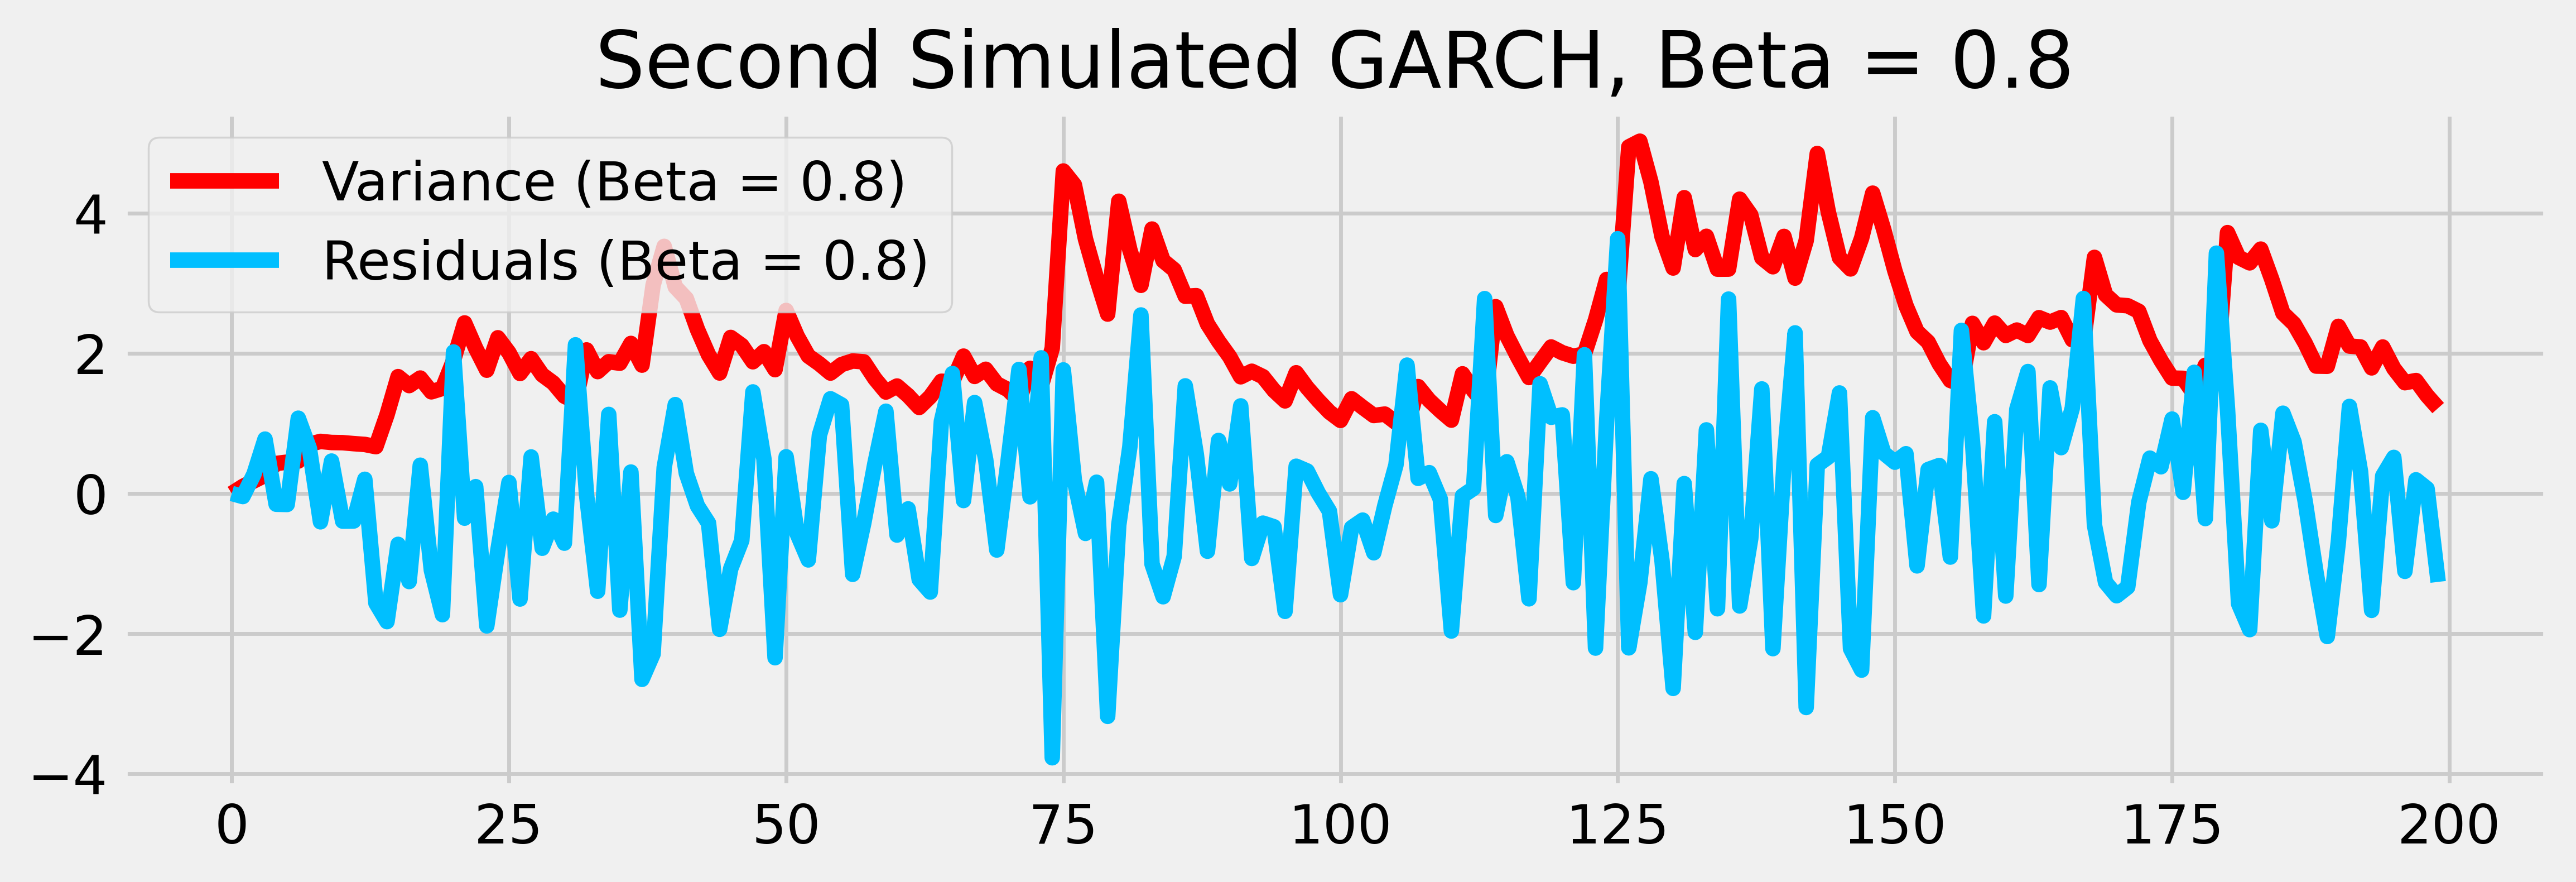

In [25]:
plt.figure(figsize=(10, 3), dpi=500)
sim_resid_1, sim_variance_1 = simulate_garch_series(num_points=200, omega=0.1, alpha=0.2, beta=0.2)
plt.plot(sim_variance_1, color='orange', label='Variance (Beta = 0.2)')
plt.plot(sim_resid_1, color='green', label='Residuals (Beta = 0.2)')
plt.title('First Simulated GARCH, Beta = 0.2')
plt.legend(loc='best')
plt.show()

# Second Simulated GARCH with Beta = 0.8
plt.figure(figsize=(10, 3), dpi=500)
sim_resid_2, sim_variance_2 = simulate_garch_series(num_points=200, omega=0.1, alpha=0.2, beta=0.8)
plt.plot(sim_variance_2, color='red', label='Variance (Beta = 0.8)')
plt.plot(sim_resid_2, color='deepskyblue', label='Residuals (Beta = 0.8)')
plt.title('Second Simulated GARCH, Beta = 0.8')
plt.legend(loc='best')
plt.show()

Iteration:      4,   Func. Count:     29,   Neg. LLF: 6586.9129652223155
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6464.767293303983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6464.767257763776
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:      Daily Returns (%)   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6464.77
Distribution:                  Normal   AIC:                           12937.5
Method:            Maximum Likelihood   BIC:                           12963.5
                                        No. Observations:                 4882
Date:                Fri, Sep 27 2024   Df Residuals:                     4881
Time:         

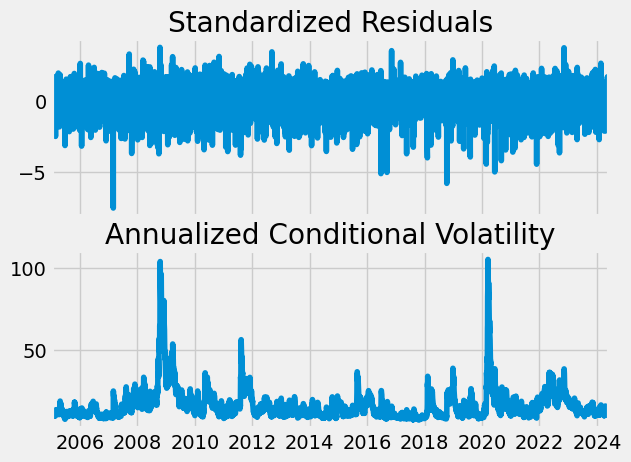

In [26]:
returns = sp_data['Daily Returns (%)']

# Ensure the data contains only finite values (no NaNs or infs)
if not np.isfinite(returns).all():
    print("Warning: There are non-finite values in returns")
    
# Specify GARCH model assumptions
basic_gm = arch_model(returns, p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
result = basic_gm.fit(update_freq=4)

# Print model results
print(result.summary())

# Plot the fitted results
fig = result.plot(annualize='D')
plt.show()

In [27]:
# Get volatility forecasts
forecast_volatility = result.forecast(horizon=5)

# Print the forecast variance
print(forecast_volatility.variance[-1:])

                h.1       h.2       h.3       h.4       h.5
Date                                                       
2024-05-29  0.44812  0.465555  0.482606  0.499283  0.515592


In [28]:
# Defining and fitting the EGARCH(1, 1) model
model = arch_model(returns, vol='EGARCH', p=1, q=1)
model_fit = model.fit()

# Printing the model summary
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 221687372152775.88
Iteration:      2,   Func. Count:     15,   Neg. LLF: 27727876509.095444
Iteration:      3,   Func. Count:     24,   Neg. LLF: 10108275392536.703
Iteration:      4,   Func. Count:     34,   Neg. LLF: 14852.77305348433
Iteration:      5,   Func. Count:     42,   Neg. LLF: 6490.028870719783
Iteration:      6,   Func. Count:     47,   Neg. LLF: 6489.8117206006555
Iteration:      7,   Func. Count:     52,   Neg. LLF: 6489.809775121383
Iteration:      8,   Func. Count:     57,   Neg. LLF: 6489.8097160477655
Iteration:      9,   Func. Count:     62,   Neg. LLF: 6489.809715103964
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6489.809715103964
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:      Daily Returns (%)   R-squared:           

Iteration:      1,   Func. Count:      5,   Neg. LLF: 34093.09913481522
Iteration:      2,   Func. Count:     14,   Neg. LLF: 11568.672839991616
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7359.748250038223
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7292.689978703409
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7292.679421004601
Iteration:      6,   Func. Count:     34,   Neg. LLF: 7292.678599076182
Iteration:      7,   Func. Count:     38,   Neg. LLF: 7292.678588609491
Iteration:      8,   Func. Count:     41,   Neg. LLF: 7292.678588609639
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7292.678588609491
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 268584453729270.94
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2741207345.8289337
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8915.14050284006

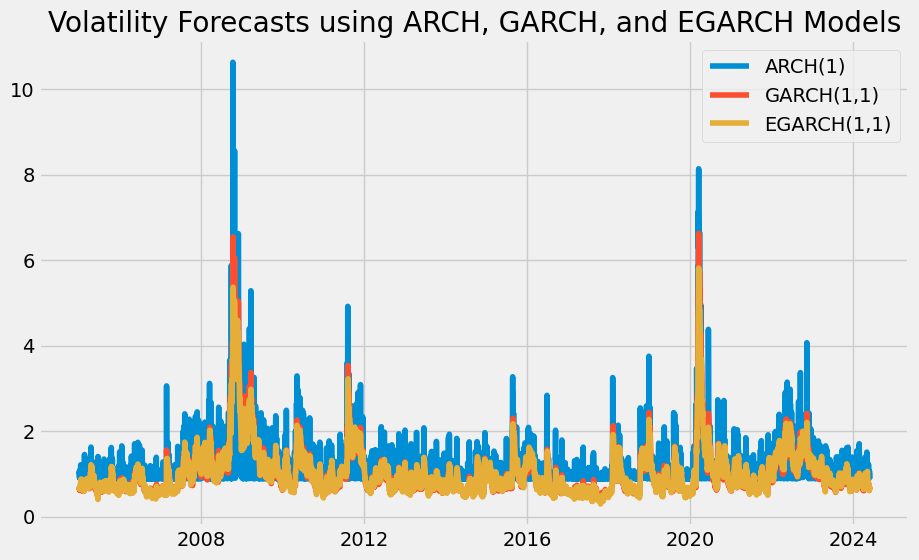

In [29]:
# Conditional volatility of the ARCH(1) model
arch_model_fit = arch_model(returns, vol='ARCH', p=1).fit()
arch_vol = arch_model_fit.conditional_volatility

# Conditional volatility of the GARCH(1, 1) model
garch_model_fit = arch_model(returns, vol='GARCH', p=1, q=1).fit()
garch_vol = garch_model_fit.conditional_volatility

# Conditional volatility of the EGARCH(1, 1) model
egarch_model_fit = arch_model(returns, vol='EGARCH', p=1, q=1).fit()
egarch_vol = egarch_model_fit.conditional_volatility

# Visualizing the volatilities
plt.figure(figsize=(10, 6))
plt.plot(arch_vol, label='ARCH(1)')
plt.plot(garch_vol, label='GARCH(1,1)')
plt.plot(egarch_vol, label='EGARCH(1,1)')
plt.legend()
plt.title('Volatility Forecasts using ARCH, GARCH, and EGARCH Models')
plt.show()